Предварительная настройка

In [7]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12



#  Загрузка данных для классификации

База данных MNIST (сокращение от «Mixed National Institute of Standards and Technology») — объёмная база данных образцов рукописного написания цифр. База данных является стандартом, предложенным Национальным институтом стандартов и технологий США с целью калибрации и сопоставления методов распознавания изображений с помощью машинного обучения в первую очередь на основе нейронных сетей.

In [1]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')
mnist

{'COL_NAMES': ['label', 'data'],
 'DESCR': 'mldata.org dataset: mnist-original',
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'target': array([0., 0., 0., ..., 9., 9., 9.])}

In [2]:
X, y = mnist["data"], mnist["target"]
X.shape

(70000, 784)

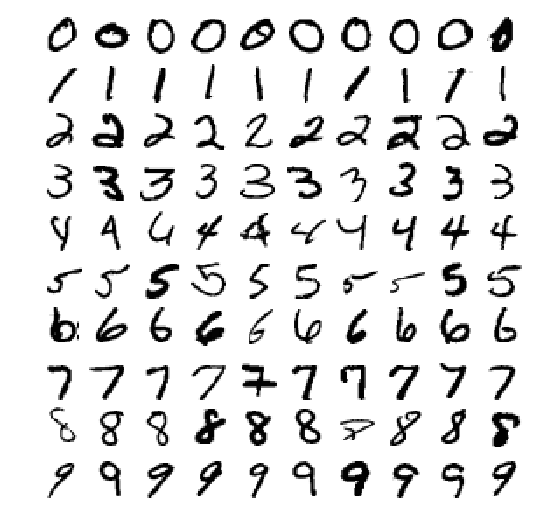

In [8]:
# EXTRA
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = matplotlib.cm.binary, **options)
    plt.axis("off")
    
plt.figure(figsize=(9,9))
example_images = np.r_[X[:12000:600], X[13000:30600:600], X[30600:60000:590]]
plot_digits(example_images, images_per_row=10)
plt.show()

## Разделение базы данных на выборки для обучения и тестирования

In [10]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:] #Соглашение для этой базы данных

##  Бинарный классификатор (5 или не 5)

In [39]:
shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

In [40]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

Переставляем в случайном порядке

In [41]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter=15, random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=15, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=None, verbose=0, warm_start=False)

[ True]


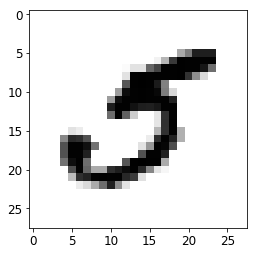

In [42]:
five_digit = X[36000]
five_digit_image = five_digit.reshape(28, 28)
plt.imshow(five_digit_image, cmap = matplotlib.cm.binary,
           interpolation="nearest")
print(sgd_clf.predict([five_digit]))


[False]


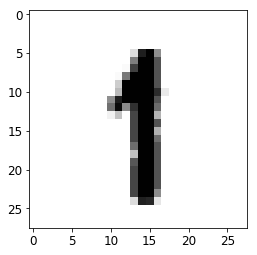

In [43]:
one_digit = X[11000]
one_digit_image = one_digit.reshape(28, 28)

plt.imshow(one_digit_image, cmap = matplotlib.cm.binary,
           interpolation="nearest")
print(sgd_clf.predict([one_digit]))

Определим точность, используя кросс-валидацию

In [44]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.944  , 0.95025, 0.9661 ])

Определим точность классификатора, который всегда возвращает "ложь".  

In [46]:
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [47]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.9102 , 0.9091 , 0.90965])

Почему она приблизительно равна 0,9?

In [49]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42)
cross_val_score(forest_clf, X_train, y_train_5, cv=3, scoring="accuracy")


array([0.98385, 0.98355, 0.9819 ])

## Многоклассавая классификатор

In [48]:
sgd_clf.fit(X_train, y_train)


array([5.])

In [54]:
sgd_clf.predict([five_digit])

array([5.])

In [55]:
sgd_clf.predict([one_digit])

array([1.])

### Случайный лес

In [57]:
forest_clf.fit(X_train, y_train)
forest_clf.predict([five_digit])

array([5.])

In [58]:
forest_clf.predict([one_digit])

array([1.])

Вероятности для каждой цифры

In [59]:
forest_clf.predict_proba([five_digit])

array([[0. , 0. , 0. , 0.2, 0. , 0.8, 0. , 0. , 0. , 0. ]])

In [60]:
forest_clf.predict_proba([one_digit])

array([[0. , 0.9, 0. , 0. , 0.1, 0. , 0. , 0. , 0. , 0. ]])

In [61]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.84663067, 0.88509425, 0.859979  ])

In [62]:
cross_val_score(forest_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.94126175, 0.94104705, 0.93884083])

### Масштабирование 

In [63]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

array([0.91146771, 0.91659583, 0.90823624])

### Confusion matrix
В этой матрицы индекс ряда - истиный значение, номер колонки - предсказанное значение, значение - количество предсказаний. Идеальный классификатор выдал бы диагональную матрицу. 


In [69]:
from sklearn.metrics import confusion_matrix
conf_mx = confusion_matrix(y_train, y_train)
conf_mx

array([[5923,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0, 6742,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0, 5958,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0, 6131,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0, 5842,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0, 5421,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0, 5918,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0, 6265,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0, 5851,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0, 5949]])

In [70]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix


y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[5721,    2,   28,    8,   11,   47,   44,    8,   49,    5],
       [   1, 6486,   43,   29,    6,   42,    8,    9,  106,   12],
       [  44,   36, 5357,   91,   84,   27,   85,   59,  161,   14],
       [  40,   39,  138, 5363,    2,  225,   32,   62,  142,   88],
       [  19,   25,   39,    9, 5360,    9,   48,   32,   94,  207],
       [  59,   37,   39,  180,   62, 4642,   98,   26,  183,   95],
       [  33,   18,   48,    2,   44,   95, 5627,    6,   44,    1],
       [  24,   19,   77,   28,   57,   12,    5, 5811,   19,  213],
       [  41,  134,   69,  147,   12,  161,   54,   25, 5081,  127],
       [  38,   31,   26,   83,  159,   39,    2,  201,   92, 5278]])

Графическое отображение

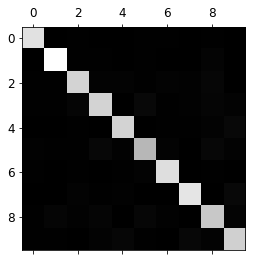

In [71]:

plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

Отмасштабируем для большей наглядности

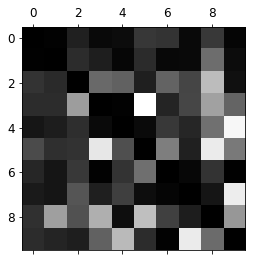

In [68]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

Из матрицы видно, что, например, 5 часто классифицируется как 8 (183 случая).

In [72]:
conf_mx[5, 8]

183

Можно более детально рассмотреть, когда классификатор выдает неправильные результаты, диагональные элементы - правильно предсказанные классы, верхняя правая - 5ки, которые были классифицированы, как 8ки, нижняя левая - 8ки, которые были классифицированы, как 5ки. 

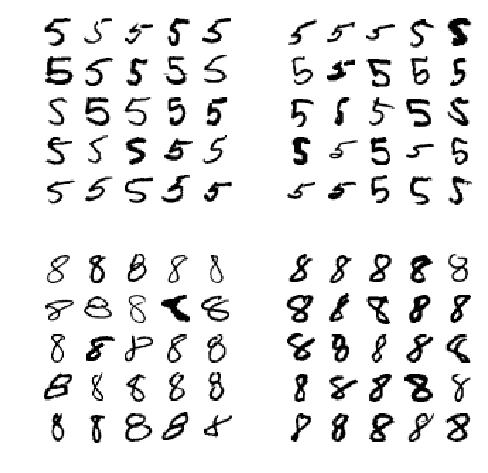

In [73]:
cl_a, cl_b = 5, 8
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]

plt.figure(figsize=(8,8))
plt.subplot(221); plot_digits(X_aa[:25], images_per_row=5)
plt.subplot(222); plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(223); plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(224); plot_digits(X_bb[:25], images_per_row=5)

plt.show()

# Задание

1. Сделайте классификатор для базы MNIST, который бы имел точность более 97%. Для этого используйте KNeighborsClassifier, и подбор параметров GridSearchCV. (Число соседей n_neighbours не больше 6).

2. Используя методы аугментации данных, повысите точность классификатора. Для этого к каждому исходному элементу выборки добваьте еще 4: изображения, сдвинутые на один пикесль вправо, влево, вверх, вниз .